In [1]:
from os import getcwd, path
import torch as t
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.patches import Polygon, FancyArrowPatch, ArrowStyle

In [2]:
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "Helvetica"
mpl.rcParams["font.size"] = 12
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amssymb}"

In [3]:
def remove_ticklines(ax):
    for tic in ax.xaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)
    for tic in ax.yaxis.get_major_ticks():
        tic.tick1line.set_visible(False)
        tic.tick2line.set_visible(False)
        tic.label1.set_visible(False)
        tic.label2.set_visible(False)

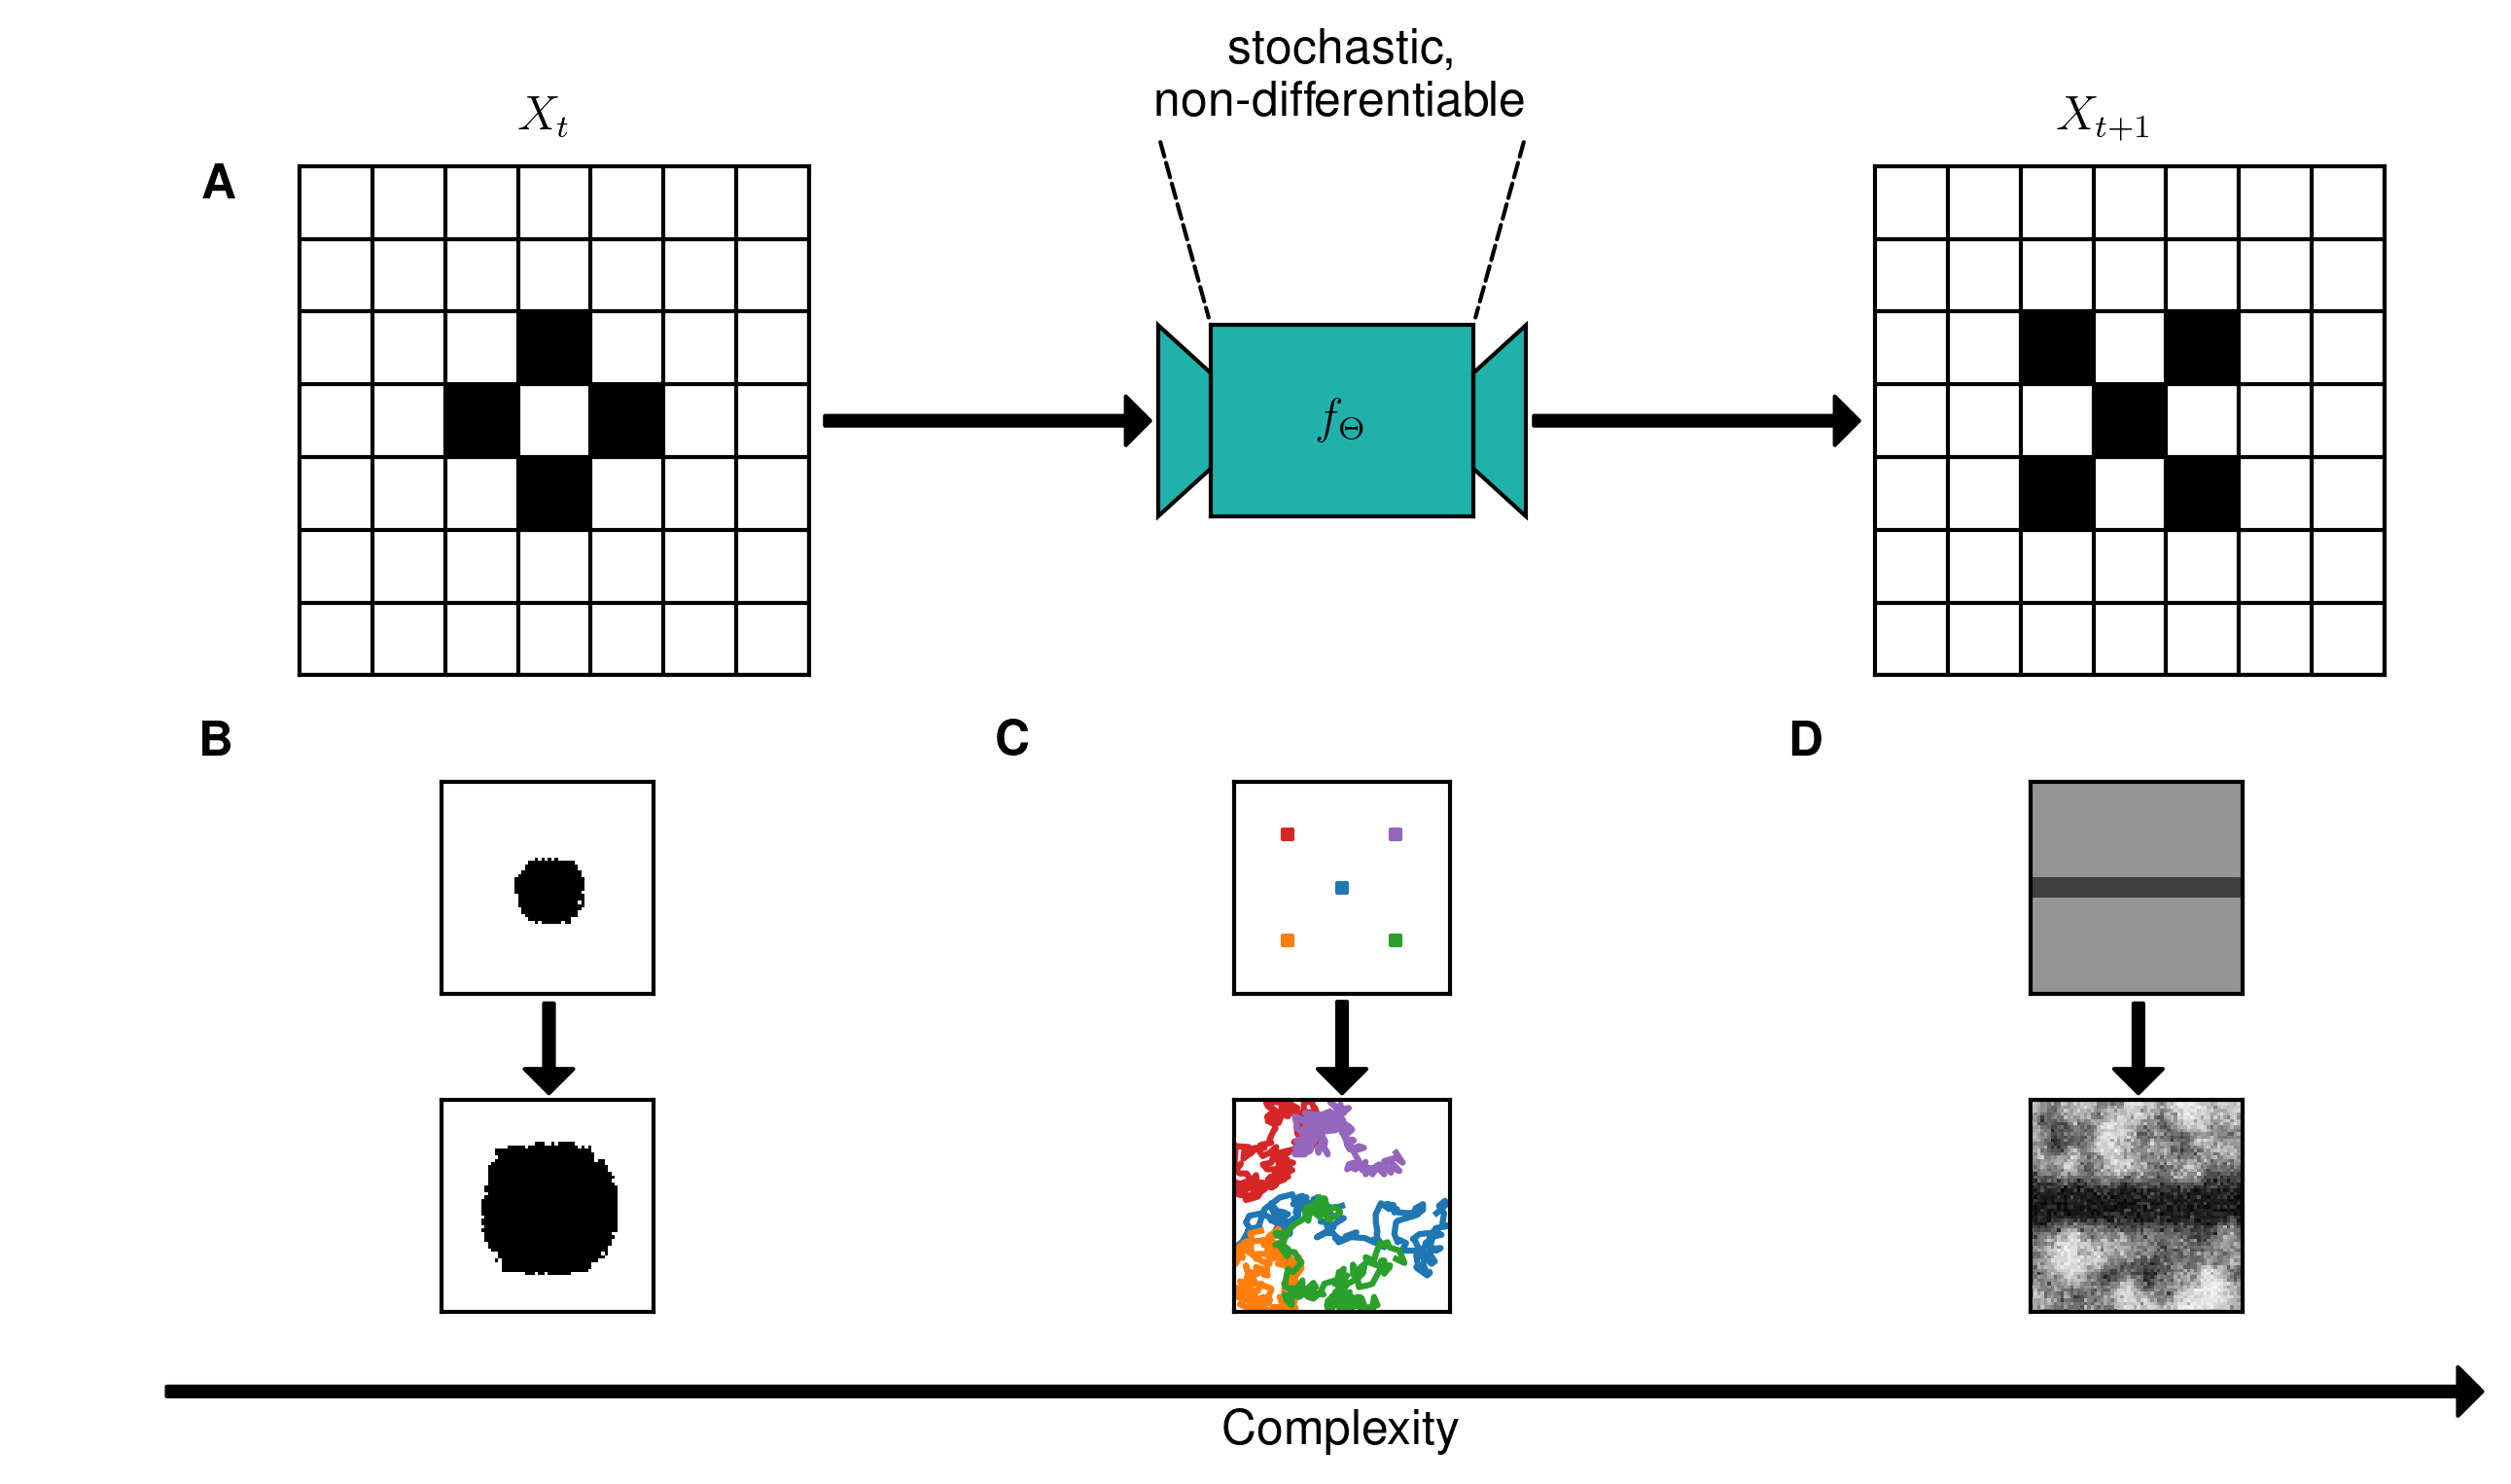

In [145]:
###
#   Define Figure
###

fig = plt.figure(layout='constrained', figsize=(9,4), dpi=300)
subfigs = fig.subfigures(2, 1, wspace=0.07, hspace=0., height_ratios=[1.2,1])

#####
#####
#       Subfigure 1: Lattice Model concept
#####
#####

###
#   Define the left lattice
###

grid_t1 = subfigs[0].add_axes([-0.2, 0.25, 0.8, 0.8])
grid_t1_lattice = t.zeros((7,7))
grid_t1_lattice[2,3] = 1 
grid_t1_lattice[4,3] = 1 
grid_t1_lattice[3,2] = 1 
grid_t1_lattice[3,4] = 1 
grid_t1.imshow(grid_t1_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t1.grid(color='black', linewidth=1)
grid_t1.set_xticks(np.arange(.5, 7.5, 1))
grid_t1.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t1)
grid_t1.text(2.5,-1.0,"$X_t$")

###
#   Define the right lattice
###

grid_t2 = subfigs[0].add_axes([0.4, 0.25, 0.8, 0.8])
grid_t2_lattice = t.zeros((7,7))
grid_t2_lattice[3,3] = 1 
grid_t2_lattice[2,2] = 1 
grid_t2_lattice[4,2] = 1 
grid_t2_lattice[4,4] = 1 
grid_t2_lattice[2,4] = 1 
grid_t2.imshow(grid_t2_lattice, cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
grid_t2.grid(color='black', linewidth=1)
grid_t2.set_xticks(np.arange(.5, 7.5, 1))
grid_t2.set_yticks(np.arange(.5, 7.5, 1))
remove_ticklines(grid_t2)
grid_t2.text(2.,-1.0,"$X_{t+1}$")

###
#   Define the model representation
###

f_box = subfigs[0].add_axes([0.45, 0.5, 0.1, 0.3], facecolor="lightseagreen")
remove_ticklines(f_box)

pts_left = np.array([
    [0., 0.75],
    [-0.2, 1.],
    [-0.2, 0.],
    [0., 0.25],
    [0., 0.75]
])
p_left = Polygon(pts_left, color="lightseagreen", clip_on=False)
p_left.set_edgecolor("black")
f_box.add_patch(p_left)

pts_right = np.array([
    [1., 0.75],
    [1.2, 1.],
    [1.2, 0.],
    [1., 0.25],
    [1., 0.75]
])
p_right = Polygon(pts_right, color="lightseagreen", clip_on=False)
p_right.set_edgecolor("black")
f_box.add_patch(p_right)
f_box.text(0.5,0.5,"$f_\\Theta$", ha="center", va="center", transform=f_box.transAxes)

f_box.annotate('',
    xy = (-0.2,0.5),
    xytext = (-1.5,0.5),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

f_box.annotate('',
    xy = (2.5,0.5),
    xytext = (1.2,0.5),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

f_box.annotate('',
    xy = (0,1),
    xytext = (-0.2,2),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)

f_box.annotate('',
    xy = (1,1),
    xytext = (1.2,2),
    arrowprops = {
        'arrowstyle': '-',
        'color': "black",
        'linestyle': '--'
    },
    horizontalalignment = 'center',
    annotation_clip=False
)
f_box.text(0.5, 2.1, "stochastic,\nnon-differentiable", ha="center", transform=f_box.transAxes)


#####
#####
#       Subfigure 2: Model examples
#####
#####


rhs = subfigs[1].subfigures(1,3)
rhs[0].text(0.2,1.15,"\\textbf{B}")
rhs[1].text(0.1,1.15,"\\textbf{C}")
rhs[2].text(0.,1.15,"\\textbf{D}")

###
#   Add the complexity arrow
###

bounding_1 = rhs[0].add_axes([0,0,1,1])
bounding_1.axis("off")
bounding_1.annotate('',
    xy = (2.85,-0.05),
    xytext = (0.15,-0.05),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)
rhs[1].text(0.5,-0.15,"Complexity",ha="center")

###
#   Code for the SI model example
###

example_1 = rhs[0]
si_sequence = np.load(path.join(getcwd(), "data", "si_sample", "sequence.npy"))
start_ex1 = example_1.add_axes([0.4,0.7,0.4,0.4])
remove_ticklines(start_ex1)
start_ex1.imshow(si_sequence[10], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)

progress_ex1 = example_1.add_axes([0.4,0.1,0.4,0.4])
remove_ticklines(progress_ex1)
progress_ex1.imshow(si_sequence[20], cmap="Greys", interpolation="nearest", vmin=0, vmax=1)
progress_ex1.annotate('',
    xy = (32,0),
    xytext = (32,-32),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)

###
#   Code for the CPM-R model
###

example_2 = rhs[1]
cpm_r_centroids = np.load(path.join(getcwd(), "data", "cpm_r_sample", "centroids.npy")).round(1)

cpm_r_lattice = np.zeros((512,512))

grid_ex2 = example_2.add_axes([0.375,0.1,0.25,0.4])
#grid_ex2.imshow(cpm_r_lattice)
#grid_ex2.scatter(centroids[:,0], centroids[:,1])
for i in range(5):
    grid_ex2.plot(cpm_r_centroids[::500,i,0], cpm_r_centroids[::500,i,1], marker=None)
    #grid_ex2.scatter(cpm_r_centroids[0,i,0], cpm_r_centroids[0,i,1], marker="s", color="black", zorder=10, s=1)
grid_ex2.set_xlim(0,128)
grid_ex2.set_ylim(0,128)
remove_ticklines(grid_ex2)
grid_ex2.annotate('',
    xy = (64,127),
    xytext = (64,192),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)


grid2_ex2 = example_2.add_axes([0.375,0.7,0.25,0.4])
for i in range(5):
    grid2_ex2.scatter(cpm_r_centroids[0,i,0], cpm_r_centroids[0,i,1], marker="s", zorder=10, s=5)
grid2_ex2.set_xlim(0,128)
grid2_ex2.set_ylim(0,128)
remove_ticklines(grid2_ex2)


###
#   Code for the FHN model
###

example_3 = rhs[2]
fhn_sequence = np.load(path.join(getcwd(), "data", "fhn_sample", "sequence.npy"))
start_ex3 = example_3.add_axes([0.2,0.7,0.4,0.4])
remove_ticklines(start_ex3)
start_ex3.imshow(fhn_sequence[0][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)

#progress_ex3 = example_3.add_axes([0.6,0.6,0.3,0.3])
#remove_ticklines(progress_ex3)
#progress_ex3.imshow(fhn_sequence[4000][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)

end_ex3 = example_3.add_axes([0.2,0.1,0.4,0.4])
remove_ticklines(end_ex3)
end_ex3.imshow(fhn_sequence[10_000][0], cmap="Greys", interpolation="nearest", vmin=0,vmax=50)
end_ex3.annotate('',
    xy = (32,0),
    xytext = (32,-32),
    arrowprops = {
        'arrowstyle': ArrowStyle(stylename="Simple", head_width=1.),
        'color': "black",
    },
    horizontalalignment = 'center',
    annotation_clip=False,
    zorder=10
)
#end_ex3.text(45,-15,"$f_\\Theta$")

subfigs[0].text(0.066,1,"\\textbf{A}")

plt.show()